In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
"""
torchvision.transforms.Compose([torchvision.transforms.Resize(256),
                                torchvision.transforms.RandomCrop(224),
                                torchvision.transofrms.RandomHorizontalFlip(),
                                torchvision.transforms.ToTensor(),
                                torch vision.Normalize([0.485, 0.456, -.406],[0.229, 0.224, 0.225])
                                ])
torch vision.Normalize(mean, std)
"""
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
"""
torch.utils.data.DataLoader（
                            dataset，#数据加载
                            batch_size = 1，#批处理大小设置
                            shuffle = False，#是否进项洗牌操作
                            sampler = None，#指定数据加载中使用的索引/键的序列
                            batch_sampler = None，#和sampler类似
                            num_workers = 0，#是否进行多进程加载数据设置
                            collate_fn = None，#是否合并样本列表以形成一小批Tensor
                            pin_memory = False，#如果True，数据加载器会在返回之前将Tensors复制到CUDA固定内存
                            drop_last = False，#True如果数据集大小不能被批处理大小整除，则设置为删除最后一个不完整的批处理。
                            timeout = 0，#如果为正，则为从工作人员收集批处理的超时值
                            worker_init_fn = None ）
"""
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


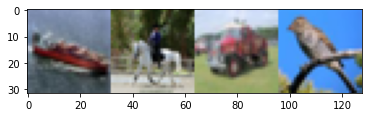

 ship horse truck  bird


'\ntorchvision.utils.make_grid(): 将多张图片进行拼接，padding为图片相隔的距离\ntensor (Tensor or list) – 4D mini-batch Tensor of shape (B x C x H x W) or a list of images all of the same size.\nnrow (int, optional) – 每一行显示的图像数. 最终图标尺寸为(B / nrow, nrow). 默认为8.\npadding (int, optional) –填充. Default is 2.\nnormalize (bool, optional) – If True, 归一化图像到(0, 1)区间\nrange (tuple, optional)\nscale_each (bool, optional) \npad_value (float, optional)\n'

In [2]:
def Imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)  ###提取一个batch
images, labels = dataiter.next()#????
#images, labels = dataiter[0]

Imshow(torchvision.utils.make_grid(images, padding=0))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
"""
torchvision.utils.make_grid(): 将多张图片进行拼接，padding为图片相隔的距离
tensor (Tensor or list) – 4D mini-batch Tensor of shape (B x C x H x W) or a list of images all of the same size.
nrow (int, optional) – 每一行显示的图像数. 最终图标尺寸为(B / nrow, nrow). 默认为8.
padding (int, optional) –填充. Default is 2.
normalize (bool, optional) – If True, 归一化图像到(0, 1)区间
range (tuple, optional)
scale_each (bool, optional) 
pad_value (float, optional)
"""

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)   #输入维度，输出维度
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
"""
nn.Conv2d(self,in_channels,out_channels,kernel_size,stride=1,padding=0,dilation=1,groups=1,bias=true,padding_mode='zeros')
nn.functional.conv2d(inputs, weight, bias, padding=1)
当时用torch.nn.functional时，需要直接传入

torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False):
kernel_size(int or tuple) - max pooling的窗口大小，
stride(int or tuple, optional) - max pooling的窗口移动的步长。默认值是kernel_size
padding(int or tuple, optional) - 输入的每一条边补充0的层数
dilation(int or tuple, optional) – 一个控制窗口中元素步幅的参数
return_indices - 如果等于True，会返回输出最大值的序号，对于上采样操作会有帮助
ceil_mode - 如果等于True，计算输出信号大小的时候，会使用向上取整，代替默认的向下取整的操作

torch.nn与torch.nn.functional的区别：
torch.nn的各种类中实现了functional的函数，想要使用functional包，需要人为手动的设置参数，比如：weight bias
"""

"\nnn.Conv2d(self,in_channels,out_channels,kernel_size,stride=1,padding=0,dilation=1,groups=1,bias=true,padding_mode='zeros')\nnn.functional.conv2d(inputs, weight, bias, padding=1)\n当时用torch.nn.functional时，需要直接传入\n\ntorch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False):\nkernel_size(int or tuple) - max pooling的窗口大小，\nstride(int or tuple, optional) - max pooling的窗口移动的步长。默认值是kernel_size\npadding(int or tuple, optional) - 输入的每一条边补充0的层数\ndilation(int or tuple, optional) – 一个控制窗口中元素步幅的参数\nreturn_indices - 如果等于True，会返回输出最大值的序号，对于上采样操作会有帮助\nceil_mode - 如果等于True，计算输出信号大小的时候，会使用向上取整，代替默认的向下取整的操作\n\ntorch.nn与torch.nn.functional的区别：\ntorch.nn的各种类中实现了functional的函数，想要使用functional包，需要人为手动的设置参数，比如：weight bias\n"

In [4]:
criterion = nn.CrossEntropyLoss()
"""
交叉熵损失函数，在函数费调用nn.functional()，会使用criterion(input, target)==(y_prediction, y)
"""
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
"""
声明了一个optmi类的对象，两个必要的参数是Adam(params, lr)
"""

'\n声明了一个optmi类的对象，两个必要的参数是Adam(params, lr)\n'

In [5]:
for epoch in tqdm(range(2)):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        print(inputs.size(0))
        optimizer.zero_grad()   
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 0:   
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

  0%|          | 0/2 [00:00<?, ?it/s]

4
[1,     1] loss: 0.001
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4

  0%|          | 0/2 [00:07<?, ?it/s]

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


KeyboardInterrupt: 

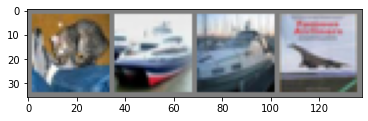

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 60 %
Accuracy of plane : 63 %
Accuracy of   car : 75 %
Accuracy of  bird : 51 %
Accuracy of   cat : 50 %
Accuracy of  deer : 43 %
Accuracy of   dog : 51 %
Accuracy of  frog : 67 %
Accuracy of horse : 57 %
Accuracy of  ship : 74 %
Accuracy of truck : 64 %


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
Imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))